In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline  

In [2]:
#1
def imReadAndConvert(filename, representation) -> np.ndarray:
    if(representation == 1):
        im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
        mat = np.asarray(im,np.float)
        mat = mat/256
    else:
        im = cv2.imread(filename,cv2.IMREAD_COLOR)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        mat = np.asarray(im,np.float)
        mat = mat/256
    return mat

In [3]:
#2
def imDisplay(filename,representation)->None:
    im = imReadAndConvert(filename,representation)
    if representation == 1:
        plt.imshow(imcmap = 'gray')
    else:  
        plt.imshow(im)

In [4]:
#4.a
def transformRGB2YIQ(imRGB:np.ndarray)->np.ndarray:
    r,g,b = cv2.split(imRGB)
    transformationMatrix = np.array([[0.299,0.576,0.144],[0.596,-0.275,-0.321],[0.212,-0.523,0.311]])
    #test = np.dot(transformationMatrix, imRGB)
    y = r*0.299 + 0.576*g + 0.144*b
    i = r*0.596 -0.275*g -0.321*b
    q = 0.212*r -0.523*g + 0.311*b
    mat = np.array([y,i,q])
    mat = np.moveaxis(mat,0,-1)
    return mat

In [5]:
#4.b
def transformYIQ2RGB(imYIQ:np.ndarray)->np.ndarray:
    y,i,q = cv2.split(imYIQ)
    #transformationMatrix = np.array([[1,0.956, 0.619],[1,-0.272,-0.647],[1,-1.106,1.703]])
    #test = np.dot(transformationMatrix, imRGB)
    r = y*1 + 0.956*i + 0.619*q
    g = y*1 -0.272*i -0.647*q
    b = y*1 -1.106*i + 1.703*q
    mat = np.array([r,g,b])
    mat = np.moveaxis(mat,0,-1)
    return mat

In [51]:
#5
def histogramEqualize(imOrig:np.ndarray)->(np.ndarray,np.ndarray,np.ndarray):
    """
    Equalizes the histogram of an image
    :param imgOrig: Original image
    :return: (imgEq,histOrg,histEQ)
    """
    workOn = 0
    flag = 0
    if len(imOrig.shape) == 3:
        #rgb picutre
        yiq = transformRGB2YIQ(imOrig)
        y,i,q = cv2.split(yiq)
        workOn = y
        flag = 1
    else:
        workOn = imOrig
    histOriginal = np.histogram(workOn)
    cumSum = np.cumsum(workOn)
    norm_cumSum = cumSum/cumSum.max()
    LUT= np.zeros(len(cumSum))
    LUT[workOn == cumSum] = norm_cumSum
    LUT = LUT.reshape(workOn.shape)
    if flag == 0:
        return LUT
    mat = np.array([LUT,i,q])
    mat = np.moveaxis(mat,0,-1)
    imNew = transformYIQ2RGB(mat)
    return (imNew,histOriginal,np.histogram(LUT))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


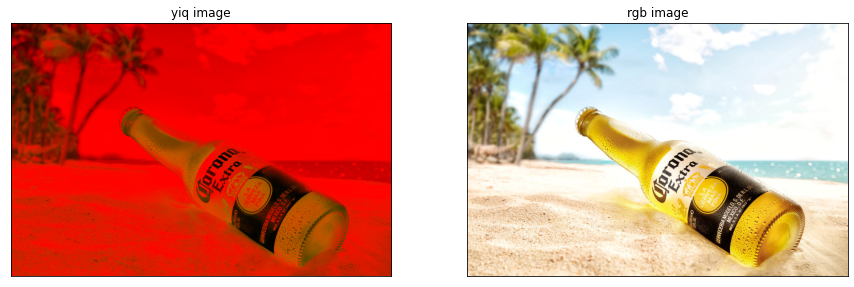

In [52]:
fig, axarr = plt.subplots(1,2,figsize=(15,15))
im = imReadAndConvert("D:\\study\\beach.jpg",2)
yiq = transformRGB2YIQ(im)
rgb = transformYIQ2RGB(yiq)
axarr[0].imshow(yiq)
axarr[0].set_title("yiq image")
axarr[0].axes.get_xaxis().set_visible(False)
axarr[0].axes.get_yaxis().set_visible(False)
axarr[1].imshow(rgb)
axarr[1].set_title("rgb image")
axarr[1].axes.get_xaxis().set_visible(False)
axarr[1].axes.get_yaxis().set_visible(False)

<ipython-input-51-336c46c7d818>:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  LUT[workOn == cumSum] = norm_cumSum
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


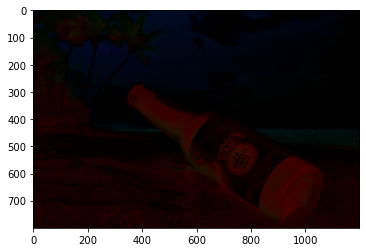

In [53]:
im,histOld,histNew = histogramEqualize(im)
plt.imshow(im)

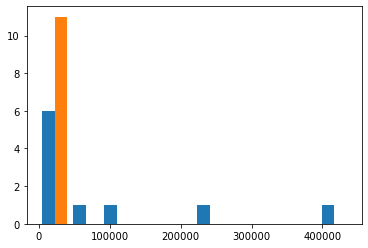

In [54]:
plt.hist(histOld);

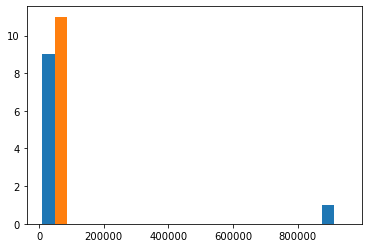

In [55]:
plt.hist(histNew);

In [12]:
len(im.shape)

2